In [240]:
import geopandas as gp

In [241]:
hd = gp.read_file("inputs/Heidelberg.json")
hd = hd.loc[hd.median_self17 != 0]
hd.head()

id  index  pop_density  population  median_self0  \
0  891fae6db2fffff  12960          0.0         0.0     79.844660   
1  891faad665bffff  12960          0.0         0.0     78.185897   
2  891fae6db3bffff  12960          0.0         0.0     82.966887   
3  891fae6db23ffff  12960          0.0         0.0     79.862928   
4  891fae6db27ffff  12960          0.0         0.0     78.373457   

   median_self1  median_self2  median_self3  median_self4  median_self5  ...  \
0     79.844660     79.844660     84.230986     91.523636     84.553554  ...   
1     78.185897     78.185897     82.000000     90.631673     84.086606  ...   
2     82.966887     82.966887     89.078740     93.353873     85.725275  ...   
3     79.862928     79.862928     85.173228     91.348199     82.137441  ...   
4     78.373457     78.373457     83.265957     90.378007     81.841040  ...   

   median_self15  median_self16  median_self17  median_self18  median_self19  \
0      85.146602      85.063523      84.931507      83.861490      83.750813   
1      84.706341      84.588065      84.587255      83.390295      83.265795   
2      85.978346      86.243738      85.795635      85.104101      85.146262   
3      82.217984      82.575045      81.583104      80.545184      80.530010   
4      82.367065      82.465517      81.942326      80.486869      80.770021   

   median_self20  median_self21  median_self22  median_self23  \
0      90.694329      90.202381      89.346726      82.663717   
1      89.934540      89.393333      88.533632      81.878873   
2      92.283379      91.786280      91.513788      84.210191   
3      89.441032      88.683957      88.464474      83.659517   
4      89.018821      88.425610      88.081660      82.271277   

                                            geometry  
0  POLYGON ((8.61057 49.36374, 8.61303 49.36314, ...  
1  POLYGON ((8.61303 49.36314, 8.61527 49.36422, ...  
2  POLYGON ((8.60317 49.36553, 8.60564 49.36493, ...  
3  POLYGON ((8.60564 49.36493, 8.60787 49.36602, ...  
4  POLYGON ((8.61258 49.36651, 8.61504 49.36591, ...  

[5 rows x 29 columns]

In [242]:
hd.explore(column='median_self17', cmap='magma_r')

In [261]:
hd.explore(column='pop_density', cmap='magma_r')

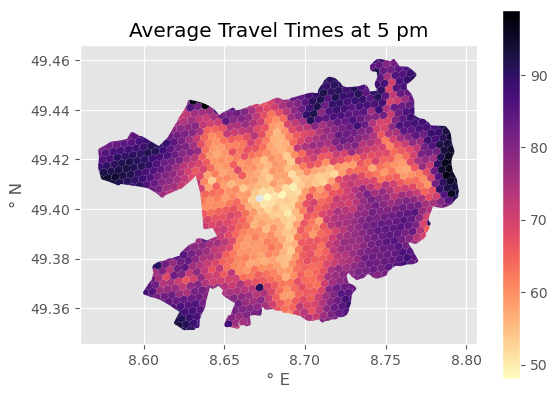

In [243]:
import matplotlib
import matplotlib.pyplot as plt
matplotlib.style.use("ggplot")
ax = hd.plot(column = 'median_self17', cmap = 'magma_r', legend = True)
plt.title(label='Average Travel Times at 5 pm')
plt.xlabel(xlabel = '° E')
plt.ylabel(ylabel='° N')
plt.savefig("figures/Heidelberg_TravelTime_Map17.svg")

/tmp/ipykernel_296455/1693863323.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pivot["id"] = hd["id"]


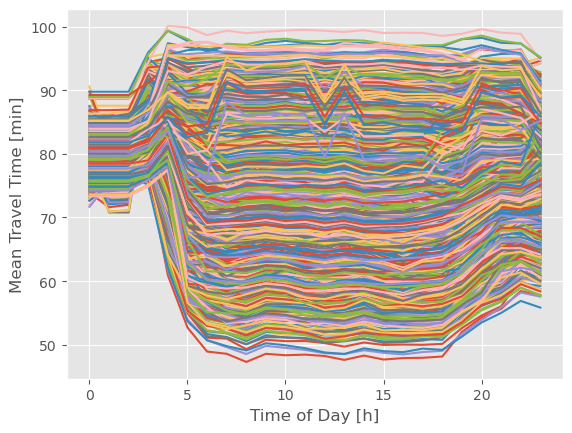

In [244]:
import matplotlib
matplotlib.style.use("ggplot")
pivot = hd.loc[:, hd.columns.str.startswith("median")]
pivot["id"] = hd["id"]
plots = pivot.set_index("id").transpose().reset_index()
plots.plot(legend=False, xlabel="Time of Day [h]", ylabel="Mean Travel Time [min]")
plt.savefig("figures/Heidelberg_TravelTime_MT17.svg")

In [245]:
plots.head()

id         index  891fae6db2fffff  891faad665bffff  891fae6db3bffff  \
0   median_self0        79.844660        78.185897        82.966887   
1   median_self1        79.844660        78.185897        82.966887   
2   median_self2        79.844660        78.185897        82.966887   
3   median_self3        84.230986        82.000000        89.078740   
4   median_self4        91.523636        90.631673        93.353873   

id  891fae6db23ffff  891fae6db27ffff  891fae6db07ffff  891fae6db33ffff  \
0         79.862928        78.373457        84.808581        82.631579   
1         79.862928        78.373457        84.808581        82.631579   
2         79.862928        78.373457        84.808581        82.631579   
3         85.173228        83.265957        91.735661        87.455801   
4         91.348199        90.378007        94.247458        93.003650   

id  891fae6db37ffff  891faad66cbffff  ...  891faa986c3ffff  891faa980cbffff  \
0         79.226744        79.677326  ...        82.240122        81.446254   
1         79.226744        79.677326  ...        82.240122        81.446254   
2         79.226744        79.677326  ...        82.240122        81.446254   
3         84.233251        83.410853  ...        82.811940        84.224551   
4         90.558587        90.852564  ...        89.515679        90.939189   

id  891faa980dbffff  891faa986c7ffff  891faa98613ffff  891faa986d7ffff  \
0         82.618243        82.931464        81.766234        80.849850   
1         82.618243        82.931464        81.766234        80.849850   
2         82.618243        82.931464        81.766234        80.849850   
3         84.858491        84.150150        83.914894        81.924419   
4         89.743041        91.318072        85.493720        85.791960   

id  891faa9868bffff  891faa9868fffff  891faa9869bffff  891faa98683ffff  
0         81.783699        79.715210        82.658065        85.162544  
1         81.783699        79.715210        82.658065        85.162544  
2         81.783699        79.715210        82.658065        85.162544  
3         82.830816        81.314815        84.171254        86.928105  
4         85.738308        83.561158        88.218182        89.667384  

[5 rows x 1301 columns]

In [246]:
summary = pivot.describe()

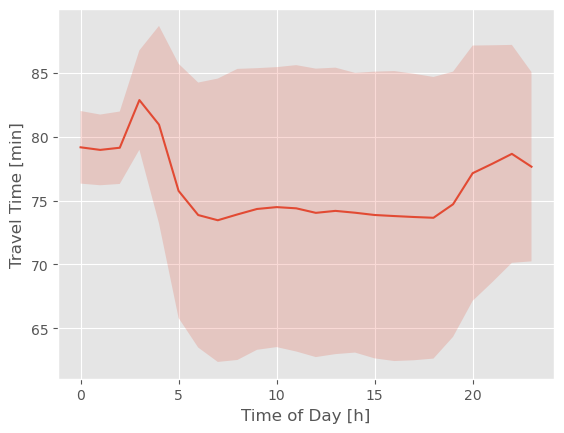

In [247]:
stats = summary.transpose().reset_index()
ax = stats["mean"].plot(legend= False, xlabel= "Time of Day [h]", ylabel="Travel Time [min]")
stats_upper = stats["mean"] + stats["std"]
stats_lower = stats["mean"] - stats['std']
ax.fill_between(stats.index, stats_lower, stats_upper, interpolate=True, alpha=0.2)
plt.savefig("figures/tt_summary_stats_all.svg", bbox_inches = "tight")

todo: group by districts

In [248]:
boroughs = gp.read_file(filename="inputs/boroughs.json")
boroughs.head()

bbox_north  bbox_south  bbox_east  bbox_west   place_id  osm_type   osm_id  \
0   49.415450   49.372224   8.768830   8.692388  139134533  relation  3283775   
1   49.411332   49.396417   8.679977   8.641543  107771397  relation  3283776   
2   49.412318   49.404317   8.694012   8.656512  107005928  relation  3283777   
3   49.383825   49.366897   8.730404   8.700155  140246307  relation  3283778   
4   49.371833   49.355110   8.728942   8.699760  139336012  relation  3283779   

         lat       lon     class            type  place_rank  importance  \
0  49.393824  8.721768  boundary  administrative          18     0.30001   
1  49.404644  8.665469  boundary  administrative          18     0.30001   
2  49.408113  8.678280  boundary  administrative          18     0.30001   
3  49.375335  8.714003  boundary  administrative          18     0.30001   
4  49.363661  8.713632  boundary  administrative          18     0.30001   

     addresstype          name  \
0  city_district      Altstadt   
1  city_district     Bahnstadt   
2  city_district      Bergheim   
3  city_district       Boxberg   
4  city_district  Emmertsgrund   

                                        display_name  \
0  Altstadt, Heidelberg, Baden-Württemberg, 69117...   
1  Bahnstadt, Heidelberg, Baden-Württemberg, Germany   
2   Bergheim, Heidelberg, Baden-Württemberg, Germany   
3    Boxberg, Heidelberg, Baden-Württemberg, Germany   
4  Emmertsgrund, Heidelberg, Baden-Württemberg, G...   

                                            geometry  
0  POLYGON ((8.69239 49.41191, 8.69333 49.40964, ...  
1  POLYGON ((8.64154 49.41130, 8.65239 49.40739, ...  
2  POLYGON ((8.65651 49.41105, 8.65886 49.41022, ...  
3  POLYGON ((8.70015 49.37283, 8.70030 49.37246, ...  
4  POLYGON ((8.69976 49.36536, 8.69997 49.36319, ...

In [249]:
cells_by_borough = hd.sjoin(boroughs, how="left")
cells_by_borough.dropna(inplace=True)
cells_by_borough_pop = cells_by_borough.loc[cells_by_borough.pop_density > 5]
cells_by_borough_pop

id  index  pop_density  population  median_self0  \
17    891fae6d96fffff  10511     6.312654    0.613060     80.871520   
24    891faad6333ffff  12461    19.116779    1.858322     80.858757   
37    891faad6ecfffff  12336    18.971403    1.844350     80.379507   
37    891faad6ecfffff  12336    18.971403    1.844350     80.379507   
40    891faad6ec3ffff  12187     8.374638    0.814106     79.733212   
...               ...    ...          ...         ...           ...   
1180  891faa982dbffff   1046     7.696148    0.747337     79.398305   
1187  891faa9866fffff    510     9.516278    0.924011     79.135468   
1189  891faa98663ffff    389    15.139939    1.469958     79.731156   
1222  891faa99523ffff   1708     9.989262    0.970083     76.786885   
1226  891faa99537ffff   1324     7.677378    0.745542     78.454183   

      median_self1  median_self2  median_self3  median_self4  median_self5  \
17       80.871520     80.871520     83.730994     89.652532     79.102746   
24       80.858757     81.230912     87.098820     74.236817     63.518933   
37       80.379507     80.590566     85.691943     80.042939     70.277729   
37       80.379507     80.590566     85.691943     80.042939     70.277729   
40       79.733212     80.150538     85.924890     78.696310     71.425458   
...            ...           ...           ...           ...           ...   
1180     79.398305     79.398305     79.939834     83.966192     74.425603   
1187     79.135468     79.135468     80.511792     84.113616     73.951817   
1189     79.731156     79.731156     81.311005     84.546931     74.756345   
1222     76.786885     76.786885     77.349462     81.282590     72.502054   
1226     78.454183     78.454183     78.968689     83.061350     73.052066   

      ...     osm_id        lat       lon     class            type  \
17    ...  3283781.0  49.374638  8.640973  boundary  administrative   
24    ...  3283784.0  49.372645  8.687259  boundary  administrative   
37    ...  3283779.0  49.363661  8.713632  boundary  administrative   
37    ...  3283784.0  49.372645  8.687259  boundary  administrative   
40    ...  3283779.0  49.363661  8.713632  boundary  administrative   
...   ...        ...        ...       ...       ...             ...   
1180  ...  3283789.0  49.430607  8.760083  boundary  administrative   
1187  ...  3283789.0  49.430607  8.760083  boundary  administrative   
1189  ...  3283789.0  49.430607  8.760083  boundary  administrative   
1222  ...  3283789.0  49.430607  8.760083  boundary  administrative   
1226  ...  3283789.0  49.430607  8.760083  boundary  administrative   

      place_rank  importance    addresstype          name  \
17          18.0     0.30001  city_district     Kirchheim   
24          18.0     0.30001  city_district      Rohrbach   
37          18.0     0.30001  city_district  Emmertsgrund   
37          18.0     0.30001  city_district      Rohrbach   
40          18.0     0.30001  city_district  Emmertsgrund   
...          ...         ...            ...           ...   
1180        18.0     0.30001  city_district  Ziegelhausen   
1187        18.0     0.30001  city_district  Ziegelhausen   
1189        18.0     0.30001  city_district  Ziegelhausen   
1222        18.0     0.30001  city_district  Ziegelhausen   
1226        18.0     0.30001  city_district  Ziegelhausen   

                                           display_name  
17    Kirchheim, Heidelberg, Baden-Württemberg, 6912...  
24    Rohrbach, Heidelberg, Baden-Württemberg, 69126...  
37    Emmertsgrund, Heidelberg, Baden-Württemberg, G...  
37    Rohrbach, Heidelberg, Baden-Württemberg, 69126...  
40    Emmertsgrund, Heidelberg, Baden-Württemberg, G...  
...                                                 ...  
1180  Ziegelhausen, Heidelberg, Baden-Württemberg, 6...  
1187  Ziegelhausen, Heidelberg, Baden-Württemberg, 6...  
1189  Ziegelhausen, Heidelberg, Baden-Württemberg, 6...  
1222  Ziegelhausen, Heidelberg, Baden-Württemberg, 6...  
1226 

In [250]:
pivot = hd.loc[:, hd.columns.str.startswith("median")]
pivot["id"] = hd["id"]
plots = pivot.set_index("id").transpose().reset_index()
plots.head()

/tmp/ipykernel_296455/4055111405.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pivot["id"] = hd["id"]


id         index  891fae6db2fffff  891faad665bffff  891fae6db3bffff  \
0   median_self0        79.844660        78.185897        82.966887   
1   median_self1        79.844660        78.185897        82.966887   
2   median_self2        79.844660        78.185897        82.966887   
3   median_self3        84.230986        82.000000        89.078740   
4   median_self4        91.523636        90.631673        93.353873   

id  891fae6db23ffff  891fae6db27ffff  891fae6db07ffff  891fae6db33ffff  \
0         79.862928        78.373457        84.808581        82.631579   
1         79.862928        78.373457        84.808581        82.631579   
2         79.862928        78.373457        84.808581        82.631579   
3         85.173228        83.265957        91.735661        87.455801   
4         91.348199        90.378007        94.247458        93.003650   

id  891fae6db37ffff  891faad66cbffff  ...  891faa986c3ffff  891faa980cbffff  \
0         79.226744        79.677326  ...        82.240122        81.446254   
1         79.226744        79.677326  ...        82.240122        81.446254   
2         79.226744        79.677326  ...        82.240122        81.446254   
3         84.233251        83.410853  ...        82.811940        84.224551   
4         90.558587        90.852564  ...        89.515679        90.939189   

id  891faa980dbffff  891faa986c7ffff  891faa98613ffff  891faa986d7ffff  \
0         82.618243        82.931464        81.766234        80.849850   
1         82.618243        82.931464        81.766234        80.849850   
2         82.618243        82.931464        81.766234        80.849850   
3         84.858491        84.150150        83.914894        81.924419   
4         89.743041        91.318072        85.493720        85.791960   

id  891faa9868bffff  891faa9868fffff  891faa9869bffff  891faa98683ffff  
0         81.783699        79.715210        82.658065        85.162544  
1         81.783699        79.715210        82.658065        85.162544  
2         81.783699        79.715210        82.658065        85.162544  
3         82.830816        81.314815        84.171254        86.928105  
4         85.738308        83.561158        88.218182        89.667384  

[5 rows x 1301 columns]

In [251]:
mean_boroughs = cells_by_borough.groupby(["name"]).mean("median_self17")
mean_boroughs

index  pop_density  population  median_self0  \
name                                                                  
Altstadt        11277.220930     3.143966    0.305357     77.887672   
Bahnstadt        6455.440000    22.833308    2.217136     78.057833   
Bergheim         5647.076923    26.780318    2.600522     78.283938   
Boxberg         12306.102564     3.183476    0.309393     75.598794   
Emmertsgrund    12573.348837     3.385829    0.329122     79.094997   
Handschuhsheim   7644.188482     6.473891    0.628407     81.056463   
Kirchheim       11181.822660     6.415162    0.623203     77.895756   
Neuenheim        6887.523256    15.390614    1.494310     80.247332   
Pfaffengrund     6806.245283    16.622043    1.613841     78.864154   
Rohrbach        11211.612903    17.049795    1.656752     77.431442   
Schlierbach     10358.222222     1.819464    0.176766     79.682348   
Südstadt         8925.241379    21.796477    2.117444     76.760222   
Weststadt        7384.517241    30.031249    2.916635     76.198859   
Wieblingen       7580.708108     4.155949    0.403341     80.021944   
Ziegelhausen     9974.480000     2.385237    0.231684     80.089974   

                median_self1  median_self2  median_self3  median_self4  \
name                                                                     
Altstadt           77.930564     77.978002     80.148389     78.686817   
Bahnstadt          78.335309     78.564862     78.592364     66.421304   
Bergheim           78.450469     78.510190     77.668791     64.805917   
Boxberg            75.598794     75.765770     80.868434     79.424077   
Emmertsgrund       79.094997     79.224947     84.480660     83.206180   
Handschuhsheim     80.992830     81.395417     85.276920     83.141644   
Kirchheim          78.088827     78.212038     82.332169     81.174588   
Neuenheim          80.332813     80.498523     81.598522     73.767608   
Pfaffengrund       78.996527     79.171905     80.096057     72.106381   
Rohrbach           77.820433     77.979672     82.168941     74.795433   
Schlierbach        79.728826     79.834119     82.411244     82.137517   
Südstadt           77.494319     77.494319     77.980761     67.768110   
Weststadt          77.516552     77.573704     77.210620     63.840583   
Wieblingen         78.148404     78.458537     86.262470     81.835090   
Ziegelhausen       80.095017     80.126356     81.984529     86.152990   

                median_self5  median_self6  ...  bbox_north  bbox_south  \
name                                        ...                           
Altstadt           75.504071     72.574249  ...   49.415450   49.372224   
Bahnstadt          60.450086     57.231432  ...   49.411332   49.396417   
Bergheim           58.724716     55.852880  ...   49.412318   49.404317   
Boxberg            75.466647     71.996707  ...   49.383825   49.366897   
Emmertsgrund       77.415131     75.621841  ...   49.371833   49.355110   
Handschuhsheim     77.519905     76.057360  ...   49.452420   49.416655   
Kirchheim          75.511638     72.801213  ...   49.397620   49.352003   
Neuenheim          66.130872     64.203074  ...   49.429302   49.410229   
Pfaffengrund       66.678934     63.640209  ...   49.414928   49.390766   
Rohrbach           67.732836     66.168773  ...   49.389393   49.355716   
Schlierbach        73.986787     72.777652  ...   49.419108   49.386438   
Südstadt           60.688726     58.778826  ...   49.398786   49.383641   
Weststadt          57.683848     55.036392  ...   49.407422   49.394452   
Wieblingen         79.340825     77.755229  ...   49.443115   49.405467   
Ziegelhausen       79.938033     78.742436  ...   49.459693   49.401329   

                bbox_east  bbox_west     place_id     osm_id        lat  \
name                                                                      
Altstadt         8.768830   8.692388  139134533.0  3283775.0  49.393824   
Bahnstadt        8.679977   8.641543  107771397.0  3283

In [252]:
mean_boroughs_pop = cells_by_borough_pop.groupby(["name"]).mean("median_self17")
mean_boroughs_pop

index  pop_density  population  median_self0  \
name                                                                  
Altstadt         5969.444444    27.866289    2.706426     78.863724   
Bahnstadt        6391.952381    26.971773    2.618984     77.851106   
Bergheim         5767.300000    34.179282    3.319011     77.924280   
Boxberg         10558.166667    19.298048    1.875521     75.465269   
Emmertsgrund    11839.250000    17.324806    1.684069     78.158024   
Handschuhsheim   2356.717391    25.815524    2.505879     79.953787   
Kirchheim        9756.725490    23.643643    2.296877     77.023706   
Neuenheim        4240.046512    30.286694    2.940599     79.341568   
Pfaffengrund     6723.250000    23.896420    2.320105     78.927356   
Rohrbach        10819.382979    32.926974    3.199553     76.952196   
Schlierbach      4738.066667    11.887675    1.154928     79.365374   
Südstadt         8689.041667    26.031168    2.528828     76.819264   
Weststadt        6917.083333    35.977939    3.494172     75.989906   
Wieblingen       3545.487179    18.174006    1.763843     80.463370   
Ziegelhausen     2997.428571    15.086549    1.465392     77.367288   

                median_self1  median_self2  median_self3  median_self4  \
name                                                                     
Altstadt           79.194821     79.216540     79.070021     70.058337   
Bahnstadt          78.191239     78.464517     78.485708     65.983390   
Bergheim           78.193608     78.271245     77.377415     64.123839   
Boxberg            75.465269     75.719997     80.939136     75.465750   
Emmertsgrund       78.158024     78.472089     84.822858     78.049335   
Handschuhsheim     79.849031     80.153452     83.134878     77.014902   
Kirchheim          77.665414     77.681386     80.237661     74.882105   
Neuenheim          79.440566     79.446095     79.155558     69.903290   
Pfaffengrund       79.117986     79.267959     80.304075     72.608191   
Rohrbach           77.669898     77.819564     81.541291     73.407317   
Schlierbach        79.537211     79.731068     82.559364     80.132297   
Südstadt           77.543374     77.543374     77.960434     67.703669   
Weststadt          77.435341     77.504400     77.198269     63.359754   
Wieblingen         80.502149     80.925797     82.620177     70.977814   
Ziegelhausen       77.386394     77.441398     79.413997     80.233129   

                median_self5  median_self6  ...  bbox_north  bbox_south  \
name                                        ...                           
Altstadt           61.293332     59.016124  ...   49.415450   49.372224   
Bahnstadt          59.961906     56.683714  ...   49.411332   49.396417   
Bergheim           57.577375     54.619989  ...   49.412318   49.404317   
Boxberg            68.189741     66.859965  ...   49.383825   49.366897   
Emmertsgrund       70.147161     66.986927  ...   49.371833   49.355110   
Handschuhsheim     65.874583     63.767655  ...   49.452420   49.416655   
Kirchheim          67.372756     64.779704  ...   49.397620   49.352003   
Neuenheim          61.855404     59.018020  ...   49.429302   49.410229   
Pfaffengrund       66.302632     63.284658  ...   49.414928   49.390766   
Rohrbach           65.284635     63.734182  ...   49.389393   49.355716   
Schlierbach        64.318773     62.684148  ...   49.419108   49.386438   
Südstadt           60.466305     58.414123  ...   49.398786   49.383641   
Weststadt          57.134435     54.094684  ...   49.407422   49.394452   
Wieblingen         66.684387     63.980415  ...   49.443115   49.405467   
Ziegelhausen       67.895523     64.831421  ...   49.459693   49.401329   

                bbox_east  bbox_west     place_id     osm_id        lat  \
name                                                                      
Altstadt         8.768830   8.692388  139134533.0  3283775.0  49.393824   
Bahnstadt        8.679977   8.641543  107771397.0  3283

In [253]:
map = boroughs.merge(mean_boroughs, on="name", how = "inner", )
map.explore(column="median_self17", cmap="magma_r")

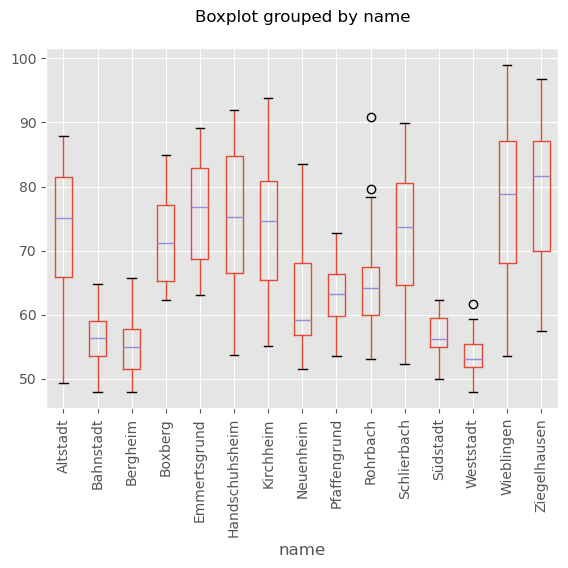

In [254]:
import matplotlib
matplotlib.style.use("ggplot")
import matplotlib.pyplot as plt
ax = cells_by_borough.boxplot(column="median_self17", by= "name")
plt.xticks(rotation=90)
plt.title(label=None)
# TODO why do these labels get cut off in the svg
plt.savefig("figures/Heidelberg_TravelTime_BP17.svg", bbox_inches = "tight")


In [255]:
mean_boroughs_pop = cells_by_borough_pop.groupby(["name"]).mean("median_self17")

In [256]:
map_pop = boroughs.merge(mean_boroughs_pop, on="name", how = "inner", )
map_pop.explore(column="median_self17", cmap="magma_r")

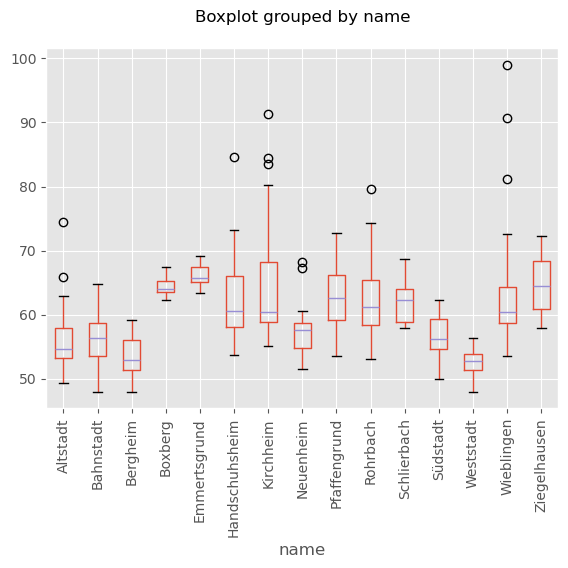

In [257]:
import matplotlib
matplotlib.style.use("ggplot")
import matplotlib.pyplot as plt
ax = cells_by_borough_pop.boxplot(column="median_self17", by= "name")
plt.xticks(rotation=90)
plt.title(label=None)
# TODO why do these labels get cut off in the svg
plt.savefig("figures/Heidelberg_TravelTime_BP_cleaned.svg", bbox_inches = "tight")

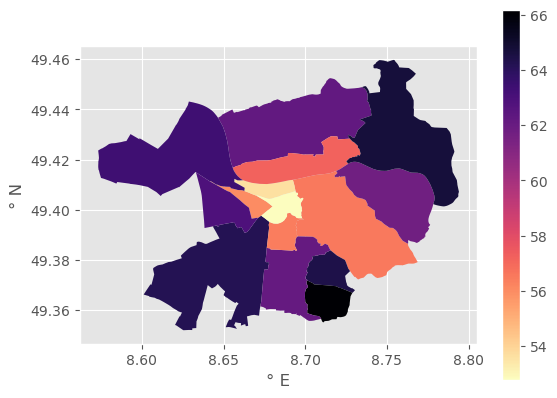

In [264]:
import matplotlib
import matplotlib.pyplot as plt
matplotlib.style.use("ggplot")
ax = map_pop.plot(column = 'median_self17', cmap = 'magma_r', legend = True)
plt.xlabel(xlabel = '° E')
plt.ylabel(ylabel='° N')
plt.savefig("figures/Boroughs_TravelTime_Map17.svg", bbox_inches = "tight")

In [259]:
pivot = mean_boroughs_pop.loc[:, mean_boroughs_pop.columns.str.startswith("median")]
pivot = pivot.rename(columns=lambda x: x.strip("median_self"))
pivot = pivot.transpose()
#pivot = pivot.transpose()
pivot.head()



name   Altstadt  Bahnstadt   Bergheim    Boxberg  Emmertsgrund  \
0     78.863724  77.851106  77.924280  75.465269     78.158024   
1     79.194821  78.191239  78.193608  75.465269     78.158024   
2     79.216540  78.464517  78.271245  75.719997     78.472089   
3     79.070021  78.485708  77.377415  80.939136     84.822858   
4     70.058337  65.983390  64.123839  75.465750     78.049335   

name  Handschuhsheim  Kirchheim  Neuenheim  Pfaffengrund   Rohrbach  \
0          79.953787  77.023706  79.341568     78.927356  76.952196   
1          79.849031  77.665414  79.440566     79.117986  77.669898   
2          80.153452  77.681386  79.446095     79.267959  77.819564   
3          83.134878  80.237661  79.155558     80.304075  81.541291   
4          77.014902  74.882105  69.903290     72.608191  73.407317   

name  Schlierbach   Südstadt  Weststadt  Wieblingen  Ziegelhausen  
0       79.365374  76.819264  75.989906   80.463370     77.367288  
1       79.537211  77.543374  77.435341   80.502149     77.386394  
2       79.731068  77.543374  77.504400   80.925797     77.441398  
3       82.559364  77.960434  77.198269   82.620177     79.413997  
4       80.132297  67.703669  63.359754   70.977814     80.233129

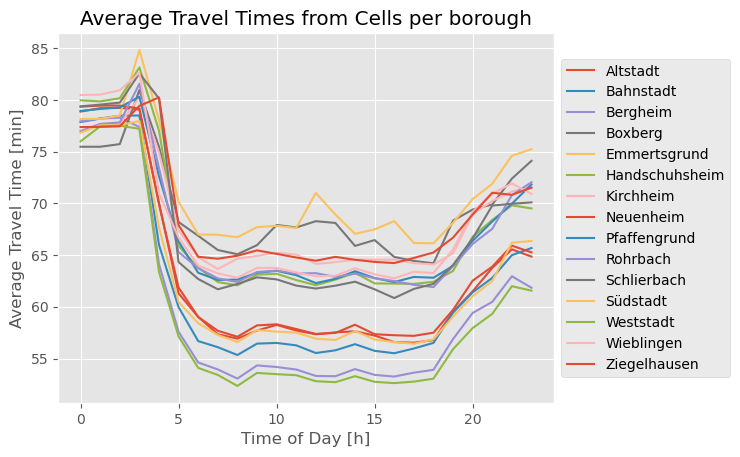

In [260]:
ax = pivot.plot(legend = False, xlabel = "Time of Day [h]", ylabel= "Average Travel Time [min]")
plt.title(label='Average Travel Times from Cells per borough')
ax.legend(loc='center left', bbox_to_anchor = (1,0.5))
plt.savefig("figures/HD_TT_boroughs_MT17.svg", bbox_inches = "tight")